In [8]:
# Importing the Required Libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import plotting
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization

In [9]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [10]:
# importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [11]:
dataset.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
print('This dataset contains ',dataset.shape[0],'rows')
print('This dataset contains ',dataset.shape[1],'columns')

This dataset contains  200 rows
This dataset contains  5 columns


In [14]:
print("Mean of Annual Income (k$) of Female:",dataset['Annual Income (k$)'].loc[dataset['Gender'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",dataset['Annual Income (k$)'].loc[dataset['Gender'] == 'Male'].mean())

Mean of Annual Income (k$) of Female: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273


<Axes: ylabel='count'>

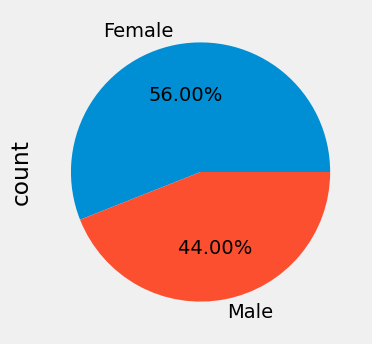

In [15]:
plt.figure(figsize=(4,4))
pd.Series(dataset['Gender']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

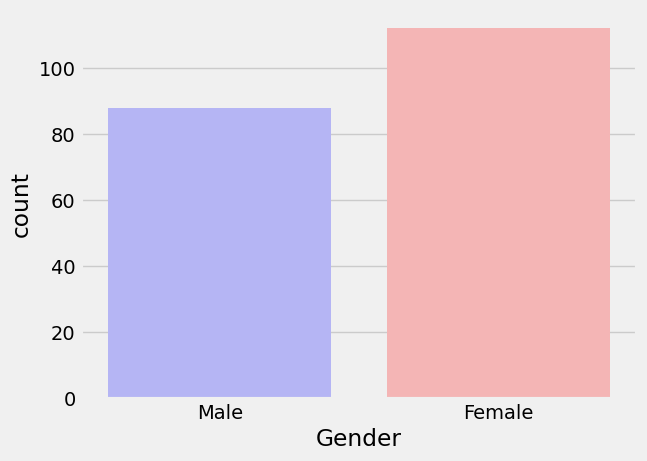

In [16]:
sns.countplot(x="Gender", data=dataset, palette="bwr")
plt.show()

In [17]:
dataset['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [18]:
dataset.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


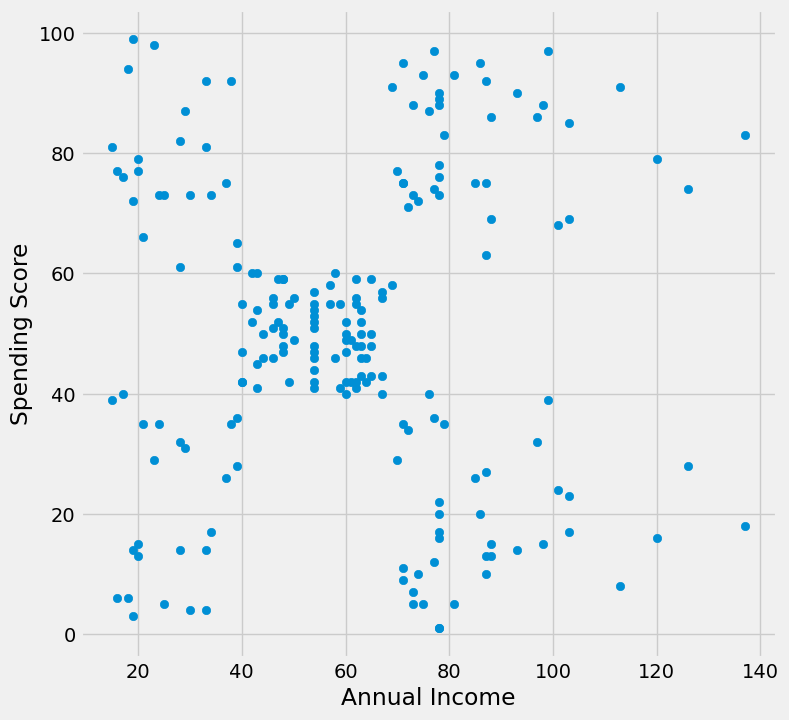

In [19]:
plt.figure(figsize = (8, 8))
plt.scatter(dataset["Annual Income (k$)"], dataset["Spending Score (1-100)"])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

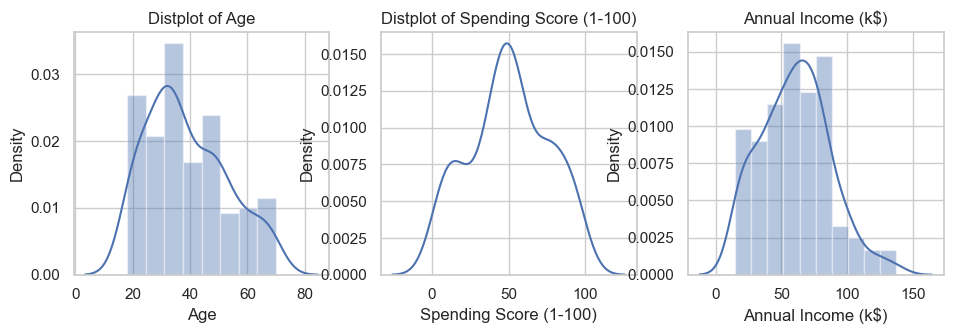

In [30]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
sns.distplot(dataset['Age'])
plt.title('Distplot of Age')
plt.subplot(1,3,2)
sns.distplot(dataset['Spending Score (1-100)'],hist=False)
plt.title('Distplot of Spending Score (1-100)')
plt.subplot(1,3,3)
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Annual Income (k$)')
plt.show()

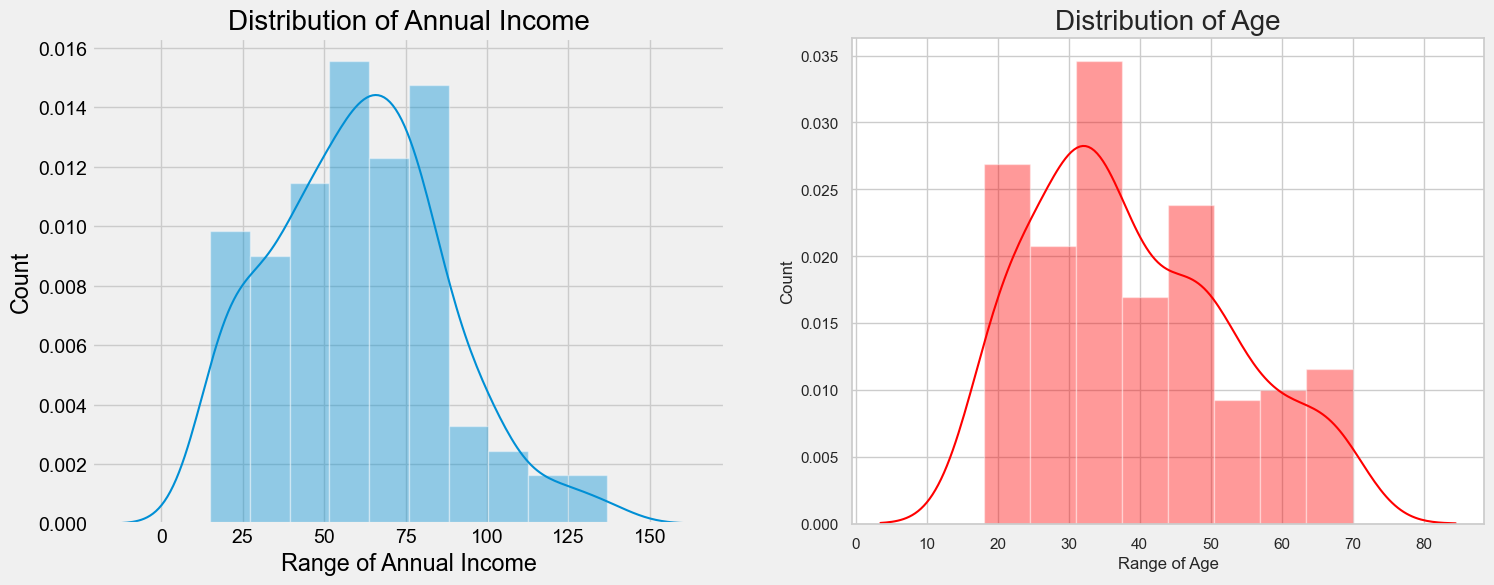

In [21]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (16, 6)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

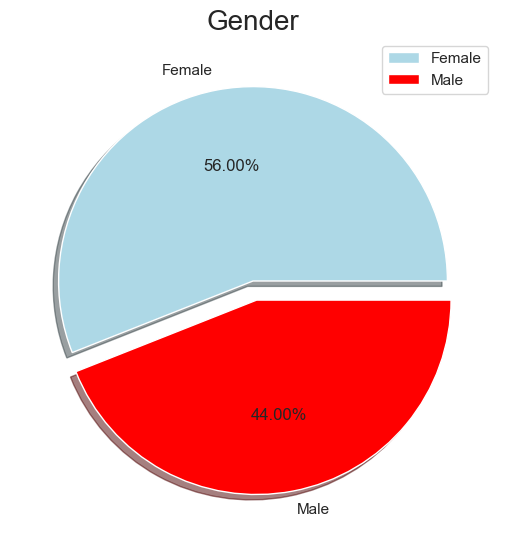

In [22]:
labels = ['Female', 'Male']
size = dataset['Gender'].value_counts()
colors = ['lightblue', 'red']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

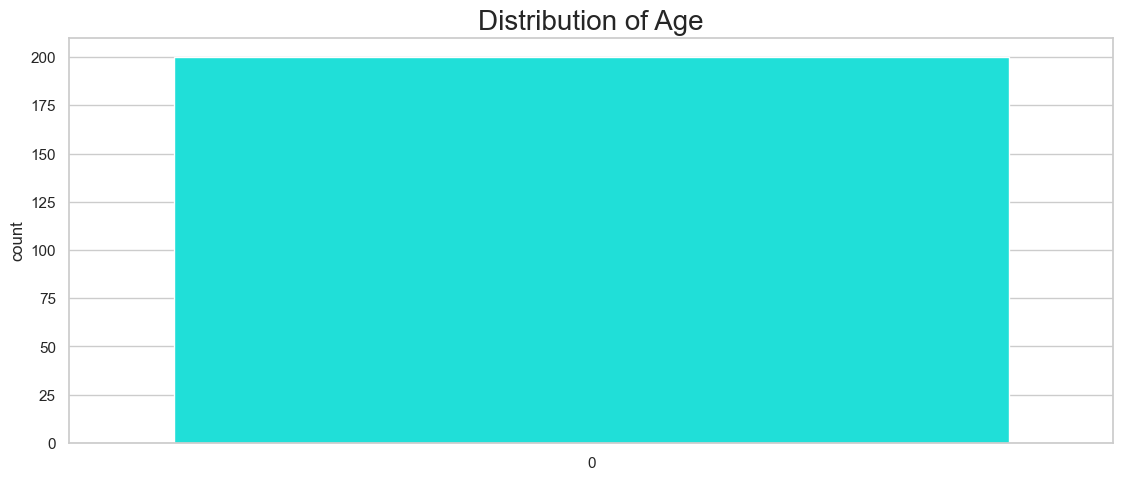

In [23]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.countplot(dataset['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

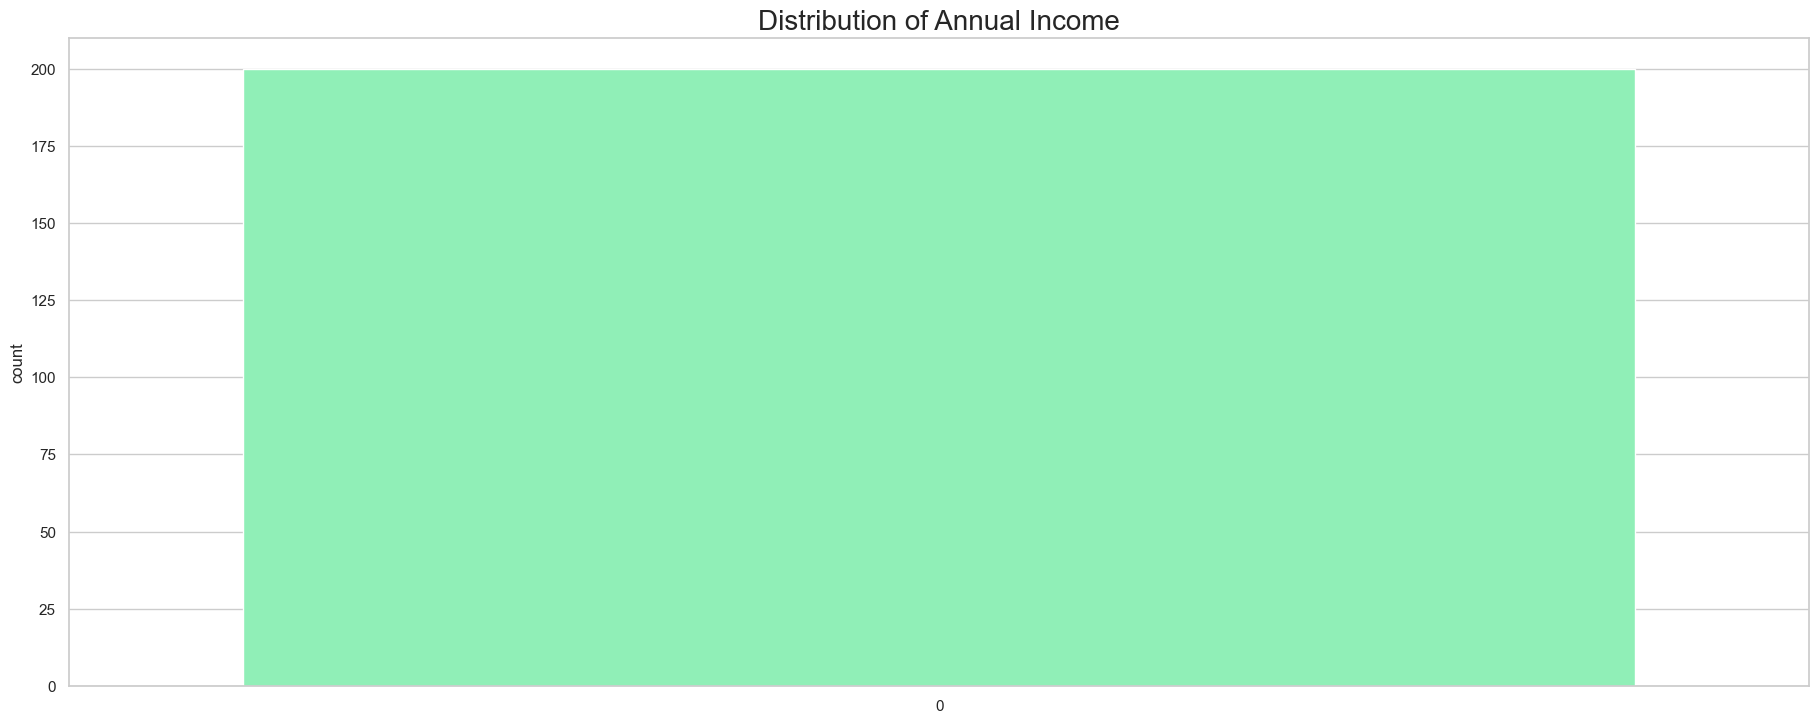

In [24]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(dataset['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

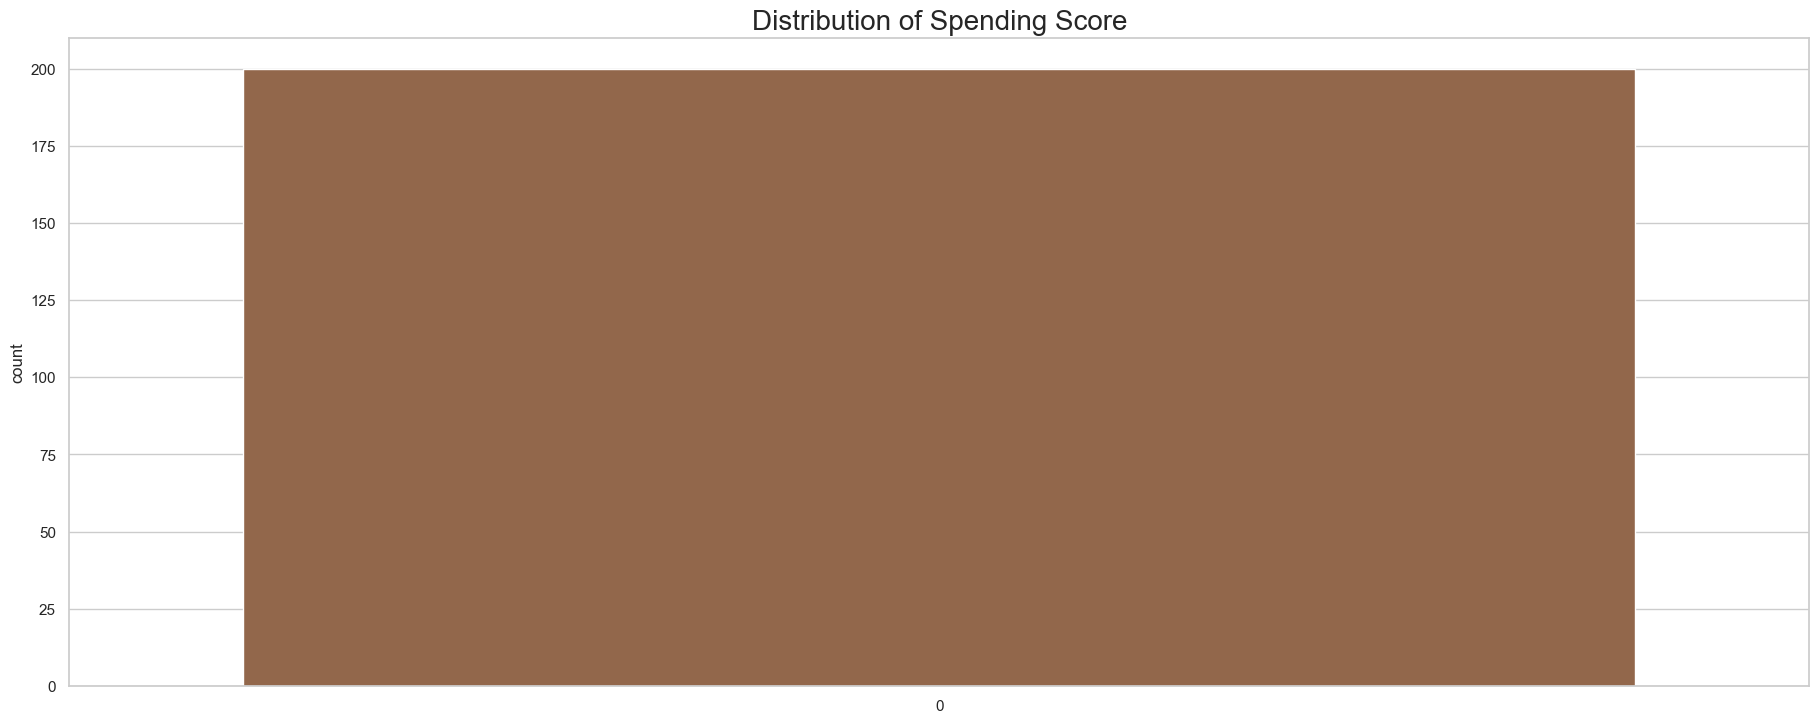

In [25]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(dataset['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

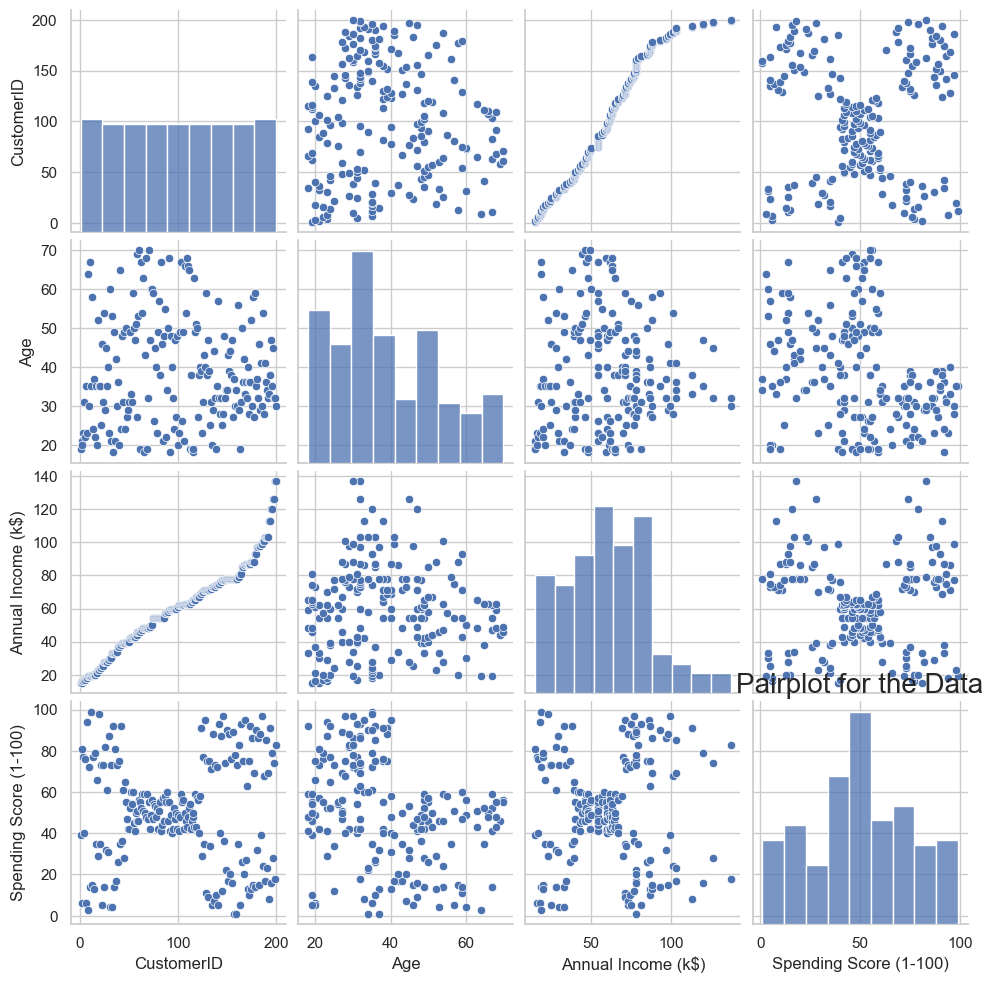

In [26]:
sns.pairplot(dataset)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

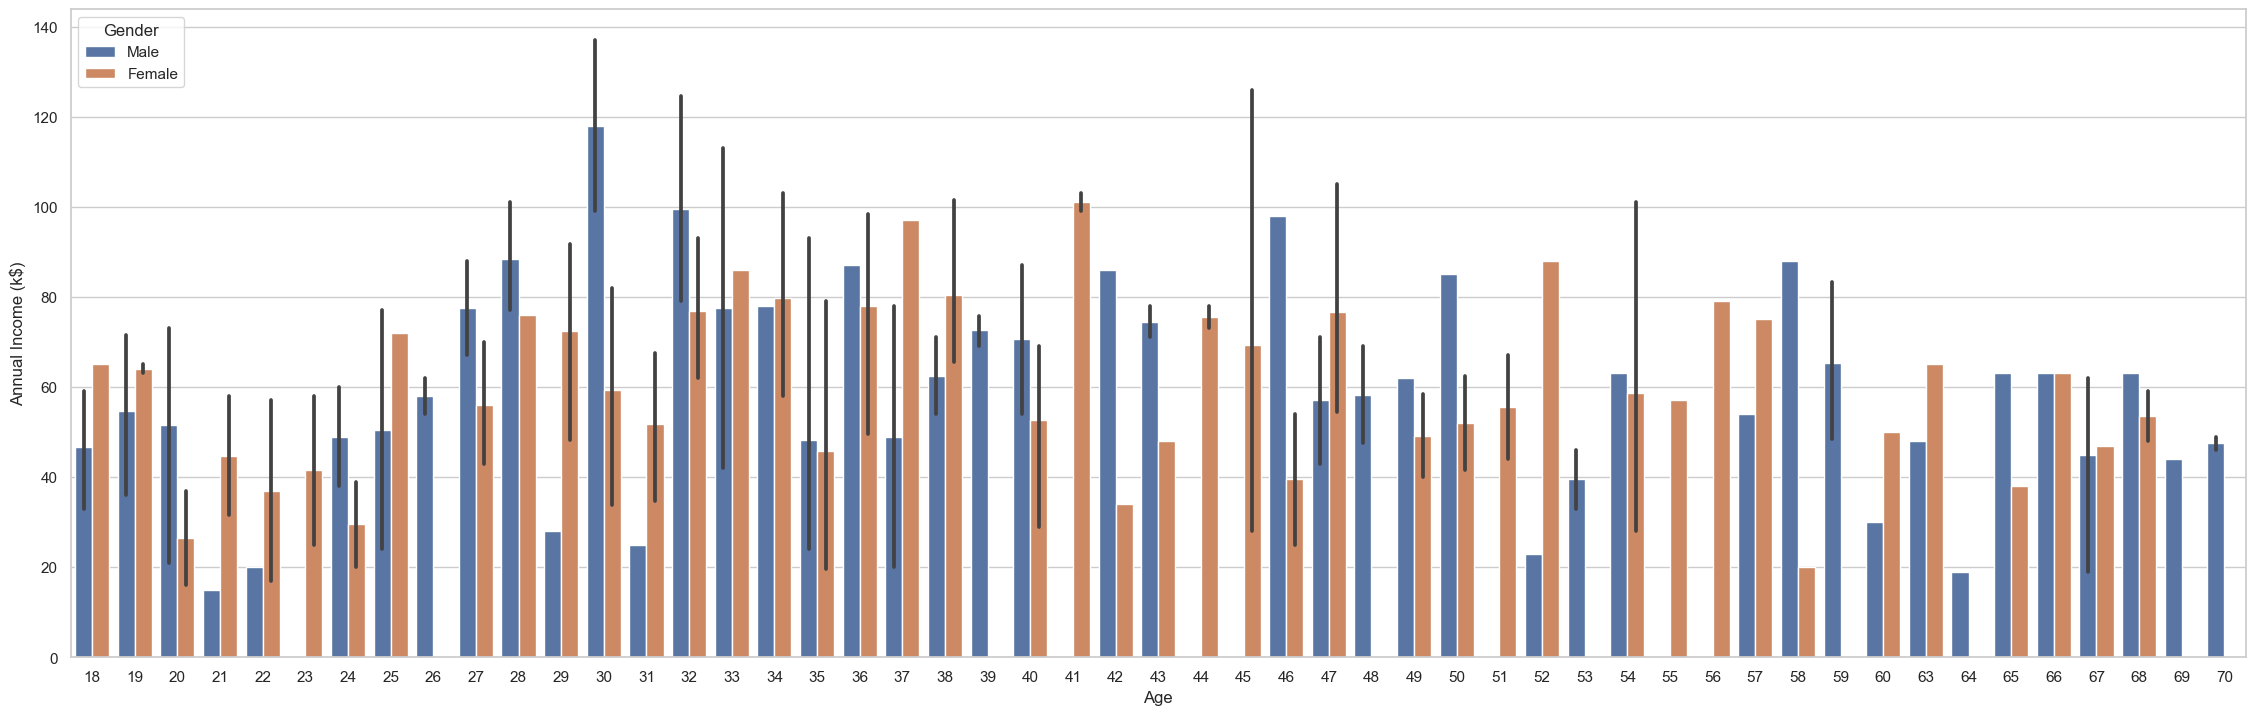

In [27]:
plt.figure(figsize=(25,8))
sns.barplot(y='Annual Income (k$)', x='Age',hue='Gender', data=dataset)
plt.show()

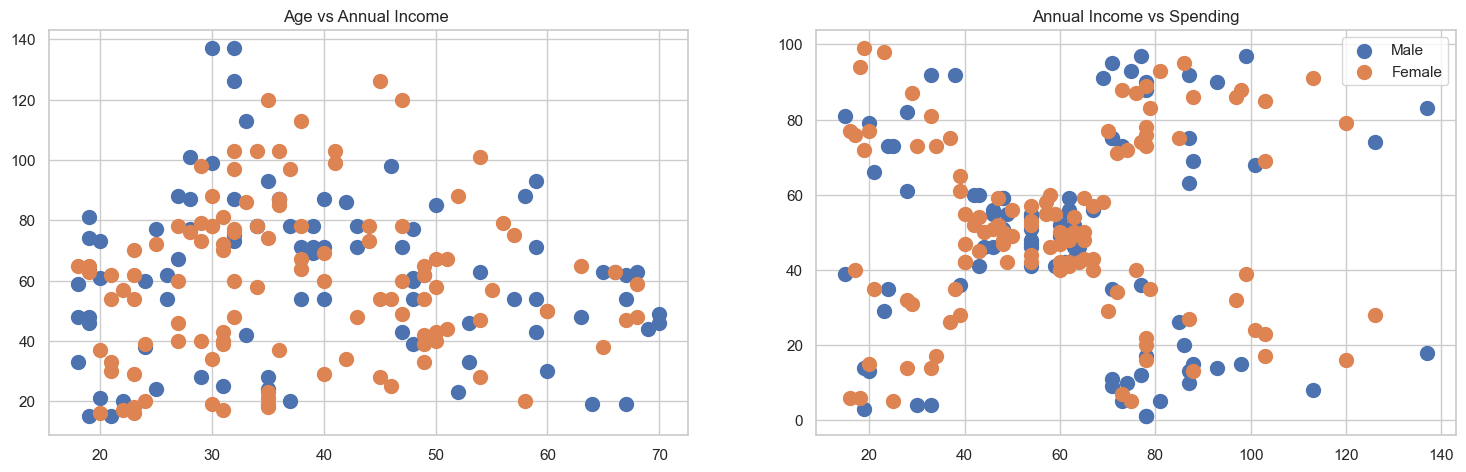

In [28]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = dataset[dataset['Gender'] == gender] ,label = gender,s=100)
    plt.title('Age vs Annual Income ')
plt.subplot(1,3,2)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,data = dataset[dataset['Gender'] == gender] ,s = 100 , label = gender)
    plt.title('Annual Income vs Spending')
plt.legend()
plt.show()

In [33]:
X= dataset.iloc[:, [3,4]].values

In [44]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

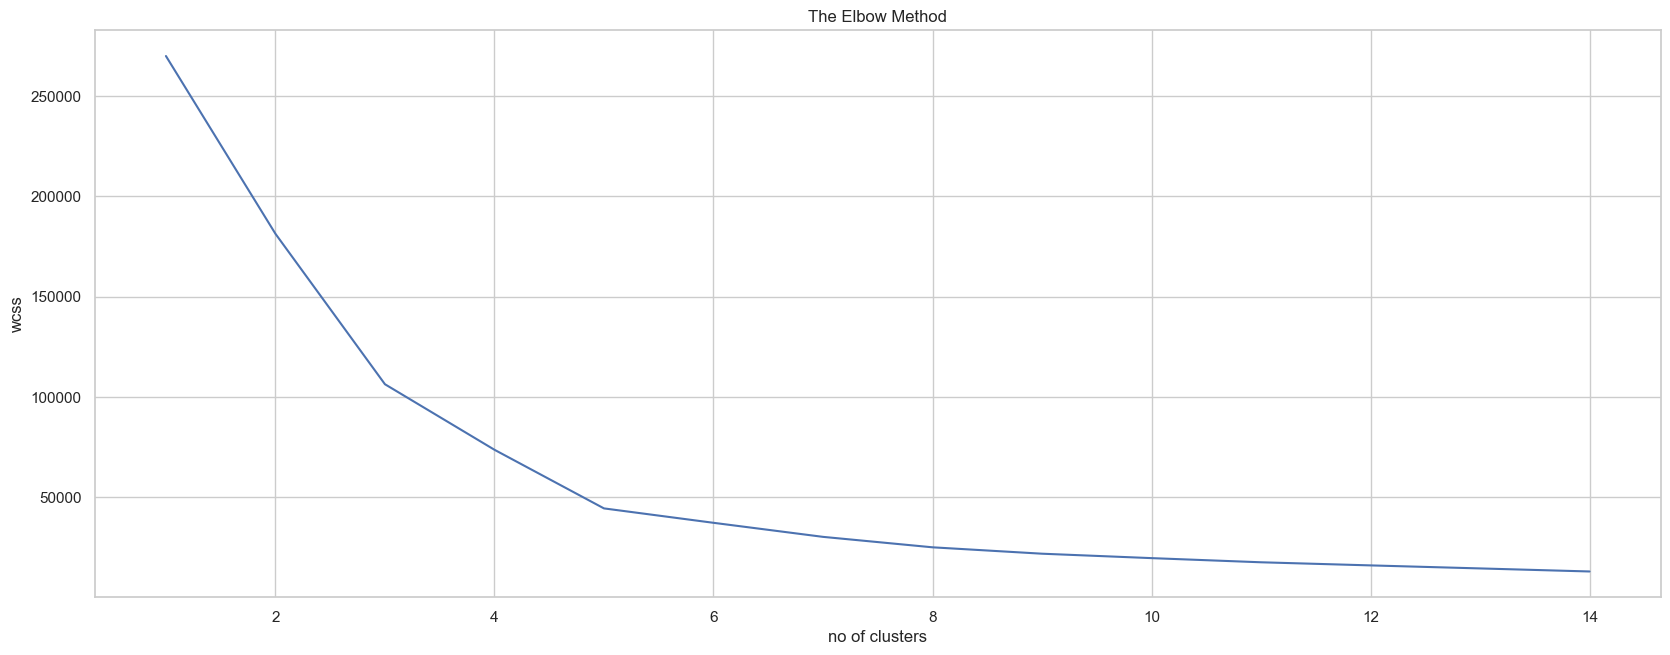

In [35]:
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

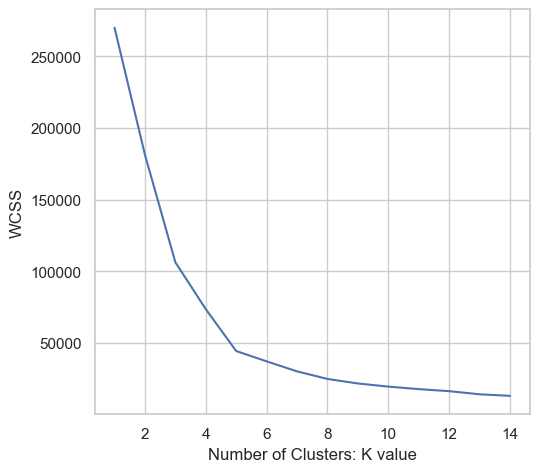

In [45]:
from sklearn.cluster import KMeans
wcss = [] 

for k in range(1,15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(X)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (5, 5))
plt.plot(range(1,15), wcss)
plt.xlabel("Number of Clusters: K value")
plt.ylabel("WCSS")
plt.show()

In [46]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

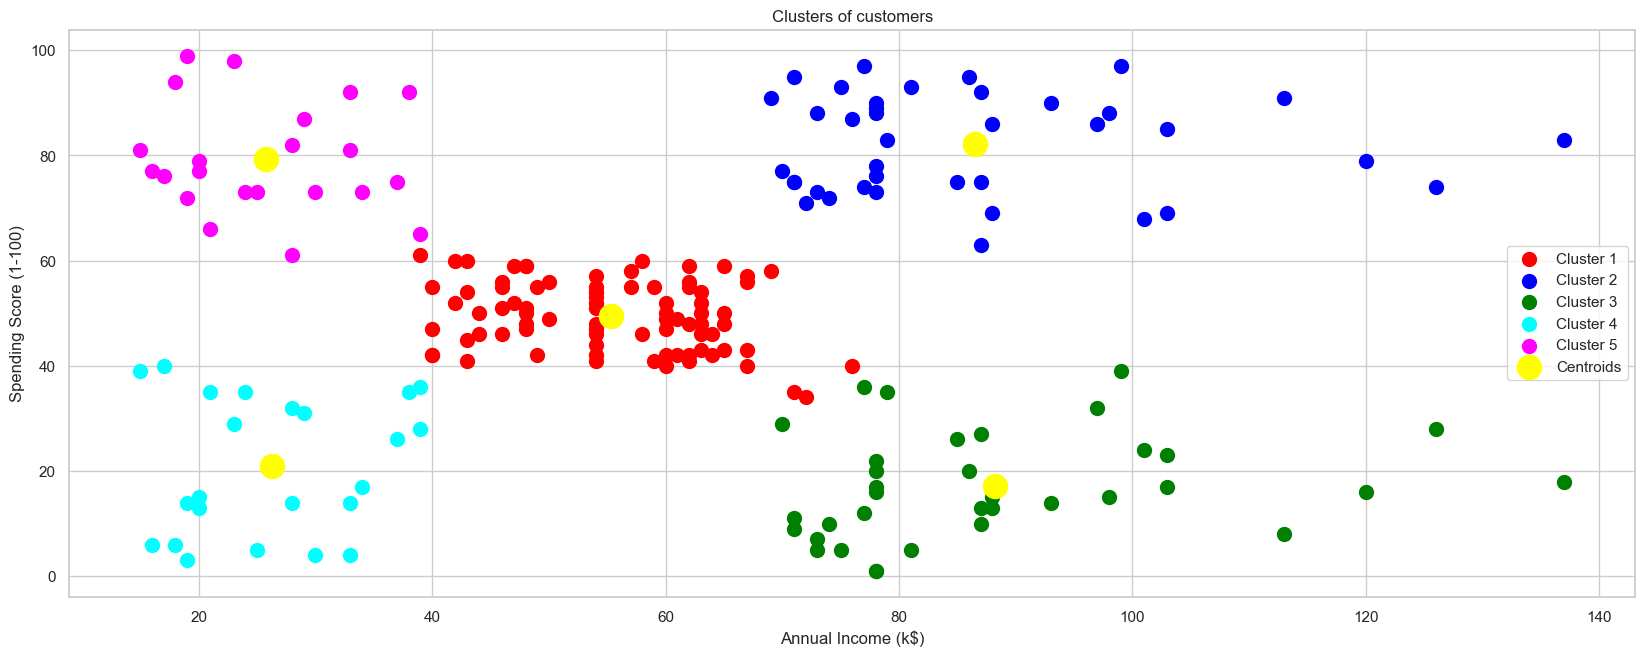

In [38]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

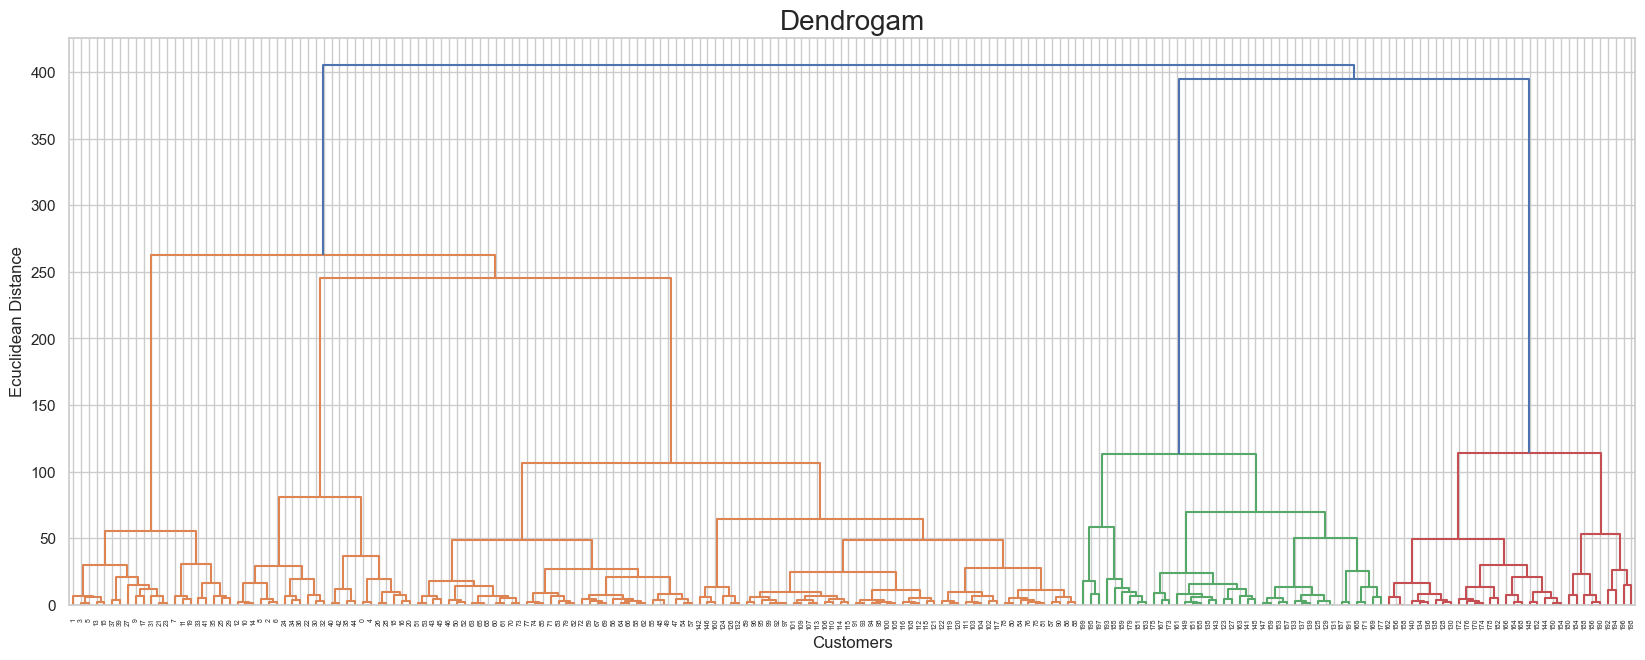

In [39]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

NameError: name 'km' is not defined

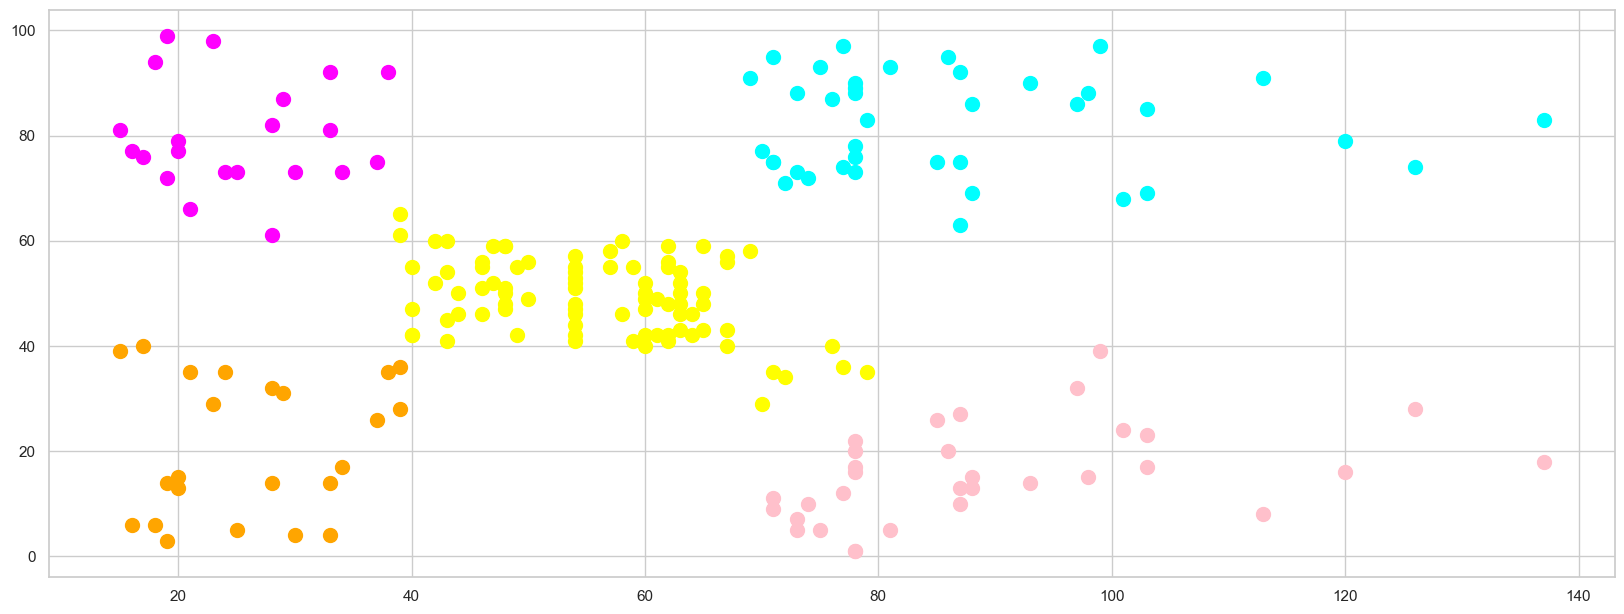

In [43]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
Y = dataset.iloc[:, [2, 4]].values
Y.shape

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(Y)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(Y[ymeans == 0, 0], Y[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(Y[ymeans == 1, 0], Y[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(Y[ymeans == 2, 0], Y[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(Y[ymeans == 3, 0], Y[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
x = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(Y)
labels = km.labels_
centroids = km.cluster_centers_

In [ ]:
data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)